In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV




In [ ]:
import os
os.chdir('/content/drive/My Drive/CS313/Project')
print("Current Working Directory:", os.getcwd())


Current Working Directory: /content/drive/My Drive/CS313/Project


In [ ]:
# Replace 'path_to_your_csv_file.csv' with the actual path to your CSV file
file_path = 'online_shoppers_intention.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)


In [ ]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [ ]:
# print(df.head())
# print(df.info())
# print(df.isnull().sum())

# Data Preprocessing Steps in Python


In [ ]:

# Identify numeric columns in the DataFrame
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Calculate z-scores only for numeric columns
z_scores = df[numeric_cols].apply(zscore)

# Define a threshold for identifying outliers
threshold = 3

# Create a mask for the data points that have absolute z-scores less than the threshold
mask = (z_scores.abs() < threshold).all(axis=1)

# Apply the mask to the DataFrame to keep only non-outlier rows in numeric columns
df = df[mask]

print(df.head())

   Administrative  Administrative_Duration  Informational  \
1               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   
5               0                      0.0              0   
9               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
1                     0.0               2                64.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   
5                     0.0              19               154.216667   
9                     0.0               3               738.000000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
1     0.000000   0.100000         0.0         0.0   Feb                 2   
3     0.050000   0.140000         0.0         0.0   Feb   

In [ ]:
# Select numerical columns (excluding categorical and binary)
numerical_columns = [
    'Administrative', 'Administrative_Duration', 'Informational',
    'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
    'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
    'OperatingSystems', 'Browser', 'Region', 'TrafficType'
]

# Calculate Z-scores for these columns
z_scores = np.abs(zscore(df[numerical_columns]))

# Define a threshold (commonly 3)
threshold = 3

# Filter out rows where any Z-score is greater than the threshold
df = df[(z_scores < threshold).all(axis=1)]

df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1,0,0.00,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
4,0,0.00,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.00,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
10,0,0.00,0,0.0,3,395.000000,0.000000,0.066667,0.0,0.0,Feb,1,1,3,3,Returning_Visitor,False,False
12,0,0.00,0,0.0,7,280.500000,0.000000,0.028571,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12323,2,64.75,0,0.0,44,1157.976190,0.000000,0.013953,0.0,0.0,Nov,2,2,1,10,Returning_Visitor,False,False
12324,0,0.00,1,0.0,16,503.000000,0.000000,0.037647,0.0,0.0,Nov,2,2,1,1,Returning_Visitor,False,False
12326,0,0.00,0,0.0,5,465.750000,0.000000,0.021333,0.0,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12328,4,75.00,0,0.0,15,346.000000,0.000000,0.021053,0.0,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


# Predictive Analysis

In [ ]:
# Make Revenue the output variable
y = df['Revenue']


In [ ]:
categorical_cols = ['Month', 'VisitorType']  # Add other categorical columns as needed
encoder = OneHotEncoder(sparse=False)

# StandardScaler or MinMaxScaler for numerical data
# For Standardization:
scaler = StandardScaler()
# For Normalization:
# scaler = MinMaxScaler()

# Create a column transformer to apply transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, numeric_cols),
        ('cat', encoder, categorical_cols)
    ])

# Fit and transform the data
df_encoded = preprocessor.fit_transform(df)
column_names = preprocessor.get_feature_names_out()  # Get new column names after transformations

# Convert array back to DataFrame
df_encoded = pd.DataFrame(df_encoded, columns=column_names)

print(df_encoded.head())

   num__Administrative  num__Administrative_Duration  num__Informational  \
0            -0.753201                     -0.657976           -0.363259   
1            -0.753201                     -0.657976           -0.363259   
2            -0.753201                     -0.657976           -0.363259   
3            -0.753201                     -0.657976           -0.363259   
4            -0.753201                     -0.657976           -0.363259   

   num__Informational_Duration  num__ProductRelated  \
0                    -0.261737            -1.011626   
1                    -0.261737            -0.633049   
2                    -0.261737            -0.207151   
3                    -0.261737            -0.964304   
4                    -0.261737            -0.775015   

   num__ProductRelated_Duration  num__BounceRates  num__ExitRates  \
0                     -0.905588         -0.605483        2.779978   
1                     -0.249516          0.804980        0.740866   
2    

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
X = df_encoded

In [ ]:

print(df_encoded.columns)

Index(['num__Administrative', 'num__Administrative_Duration',
       'num__Informational', 'num__Informational_Duration',
       'num__ProductRelated', 'num__ProductRelated_Duration',
       'num__BounceRates', 'num__ExitRates', 'num__PageValues',
       'num__SpecialDay', 'num__OperatingSystems', 'num__Browser',
       'num__Region', 'num__TrafficType', 'cat__Month_Aug', 'cat__Month_Dec',
       'cat__Month_Feb', 'cat__Month_Jul', 'cat__Month_June', 'cat__Month_Mar',
       'cat__Month_May', 'cat__Month_Nov', 'cat__Month_Oct', 'cat__Month_Sep',
       'cat__VisitorType_New_Visitor', 'cat__VisitorType_Other',
       'cat__VisitorType_Returning_Visitor'],
      dtype='object')


In [ ]:
# Check for balance in categorical and binary features
print('Amount of returning visitors' ,df['VisitorType'].value_counts())
print('Purchaces made on the weeked' ,df['Weekend'].value_counts())
print(df['Revenue'].value_counts())

Amount of returning visitors VisitorType
Returning_Visitor    6100
New_Visitor          1207
Other                  18
Name: count, dtype: int64
Purchaces made on the weeked Weekend
False    5543
True     1782
Name: count, dtype: int64
Revenue
False    6487
True      838
Name: count, dtype: int64


#Descriptive Analysis

#Visitor Behavior Analysis


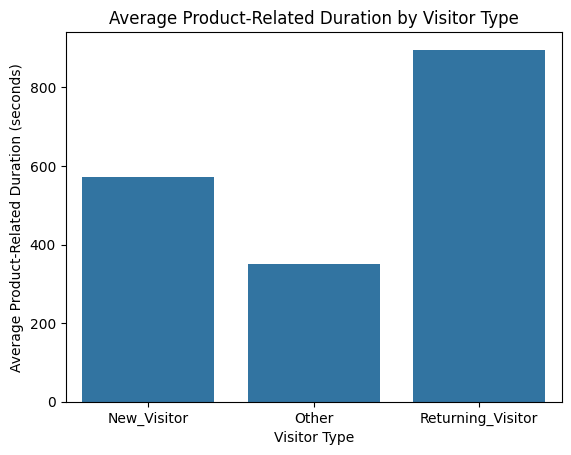

In [ ]:
# Calculate average product-related duration for different types of visitors
visitor_behavior = df.groupby('VisitorType')['ProductRelated_Duration'].mean().reset_index()

sns.barplot(x='VisitorType', y='ProductRelated_Duration', data=visitor_behavior)
plt.title('Average Product-Related Duration by Visitor Type')
plt.xlabel('Visitor Type')
plt.ylabel('Average Product-Related Duration (seconds)')
plt.show()

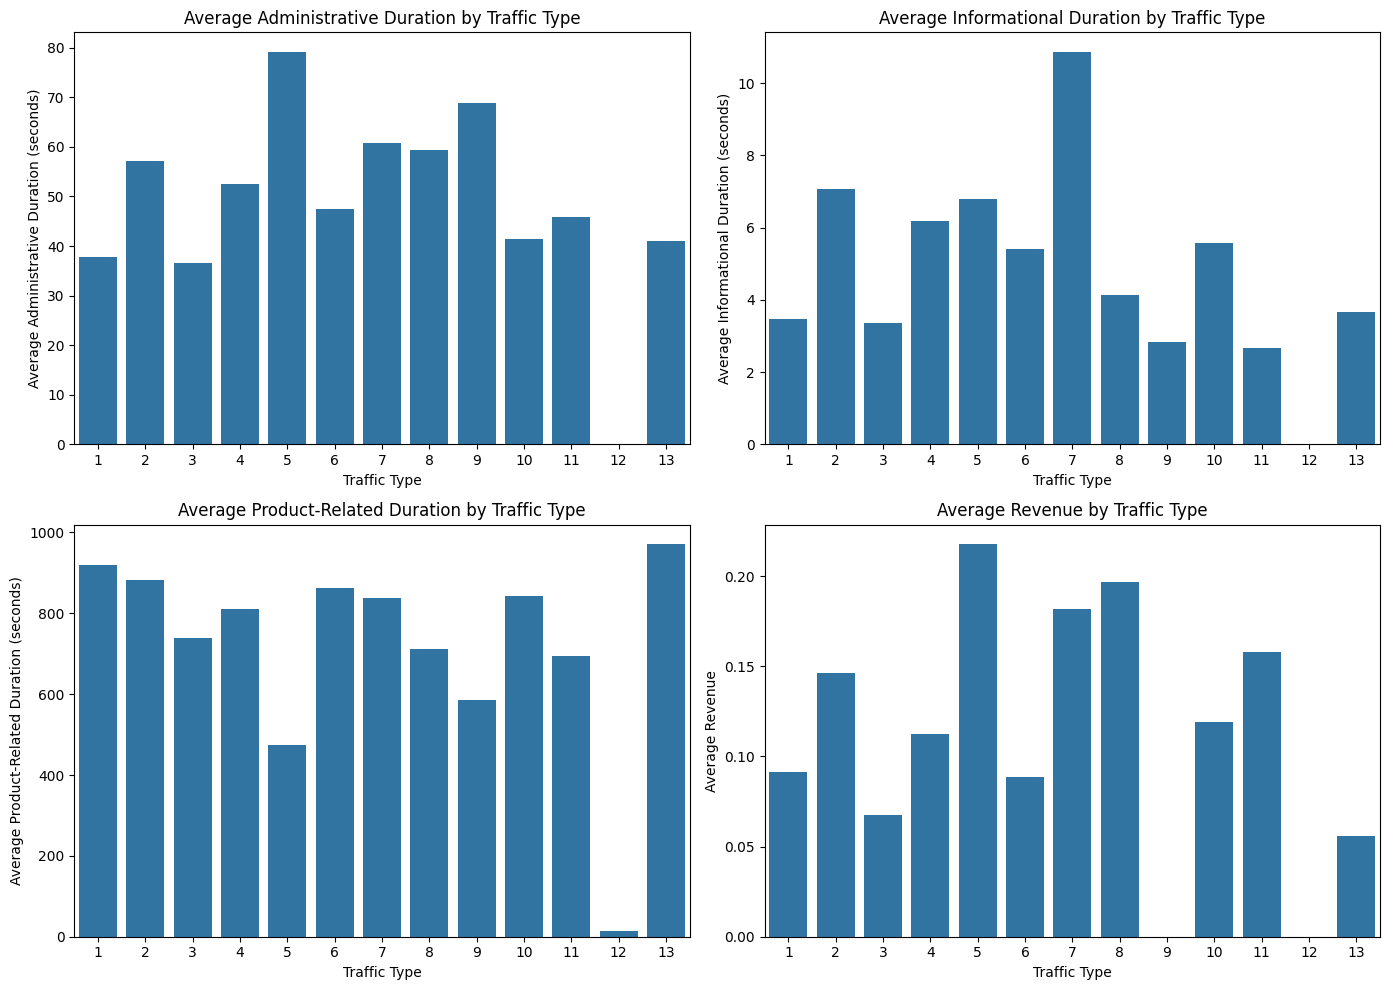

In [ ]:
# Calculate average session duration and conversion rates for different traffic types
traffic_source_analysis = df.groupby('TrafficType')[['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'Revenue']].mean().reset_index()

# Plot the results
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

sns.barplot(x='TrafficType', y='Administrative_Duration', data=traffic_source_analysis, ax=ax[0, 0])
ax[0, 0].set_title('Average Administrative Duration by Traffic Type')
ax[0, 0].set_xlabel('Traffic Type')
ax[0, 0].set_ylabel('Average Administrative Duration (seconds)')

sns.barplot(x='TrafficType', y='Informational_Duration', data=traffic_source_analysis, ax=ax[0, 1])
ax[0, 1].set_title('Average Informational Duration by Traffic Type')
ax[0, 1].set_xlabel('Traffic Type')
ax[0, 1].set_ylabel('Average Informational Duration (seconds)')

sns.barplot(x='TrafficType', y='ProductRelated_Duration', data=traffic_source_analysis, ax=ax[1, 0])
ax[1, 0].set_title('Average Product-Related Duration by Traffic Type')
ax[1, 0].set_xlabel('Traffic Type')
ax[1, 0].set_ylabel('Average Product-Related Duration (seconds)')

sns.barplot(x='TrafficType', y='Revenue', data=traffic_source_analysis, ax=ax[1, 1])
ax[1, 1].set_title('Average Revenue by Traffic Type')
ax[1, 1].set_xlabel('Traffic Type')
ax[1, 1].set_ylabel('Average Revenue')

plt.tight_layout()
plt.show()

In [ ]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1,0,0.00,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
4,0,0.00,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.00,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
10,0,0.00,0,0.0,3,395.000000,0.000000,0.066667,0.0,0.0,Feb,1,1,3,3,Returning_Visitor,False,False
12,0,0.00,0,0.0,7,280.500000,0.000000,0.028571,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12323,2,64.75,0,0.0,44,1157.976190,0.000000,0.013953,0.0,0.0,Nov,2,2,1,10,Returning_Visitor,False,False
12324,0,0.00,1,0.0,16,503.000000,0.000000,0.037647,0.0,0.0,Nov,2,2,1,1,Returning_Visitor,False,False
12326,0,0.00,0,0.0,5,465.750000,0.000000,0.021333,0.0,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12328,4,75.00,0,0.0,15,346.000000,0.000000,0.021053,0.0,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [ ]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1,0,0.00,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
4,0,0.00,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.00,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
10,0,0.00,0,0.0,3,395.000000,0.000000,0.066667,0.0,0.0,Feb,1,1,3,3,Returning_Visitor,False,False
12,0,0.00,0,0.0,7,280.500000,0.000000,0.028571,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12323,2,64.75,0,0.0,44,1157.976190,0.000000,0.013953,0.0,0.0,Nov,2,2,1,10,Returning_Visitor,False,False
12324,0,0.00,1,0.0,16,503.000000,0.000000,0.037647,0.0,0.0,Nov,2,2,1,1,Returning_Visitor,False,False
12326,0,0.00,0,0.0,5,465.750000,0.000000,0.021333,0.0,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12328,4,75.00,0,0.0,15,346.000000,0.000000,0.021053,0.0,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


#User Behavior Insights

## 1) Distribution of Purchases by Visitor Type

---



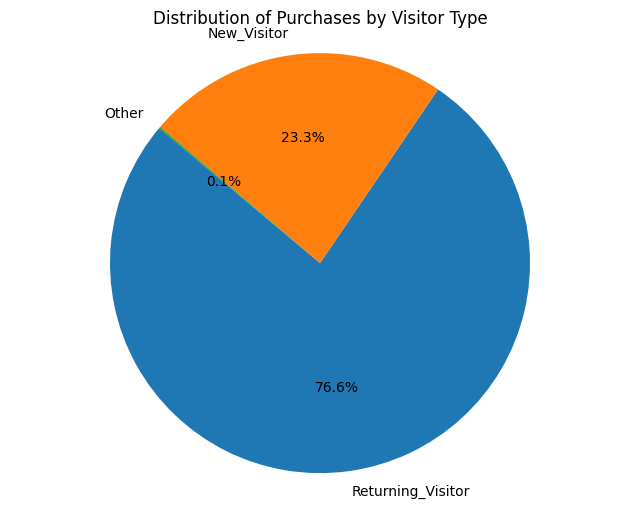

In [ ]:
# Count the number of purchases for returning visitors and new visitors
purchase_counts = df[df['Revenue'] == True]['VisitorType'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(purchase_counts, labels=purchase_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Purchases by Visitor Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

# Returning customers make up the bulk of the revenue indicating the importance of customer retention strategies

## Page Engagement

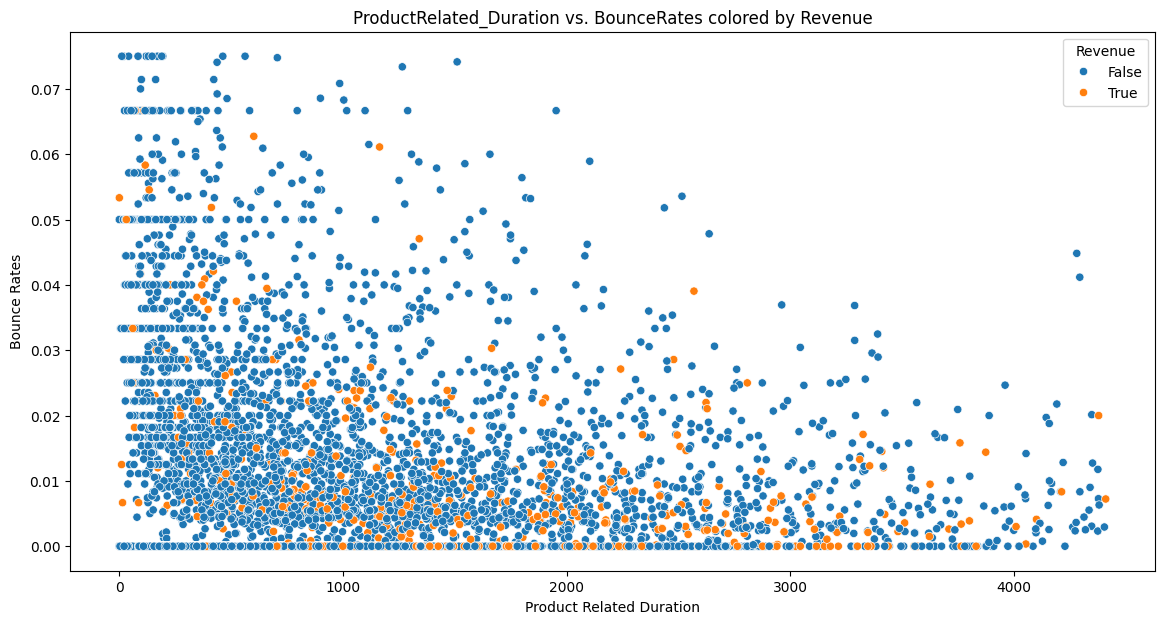

                         ProductRelated_Duration  BounceRates   Revenue
ProductRelated_Duration                 1.000000    -0.031003  0.124085
BounceRates                            -0.031003     1.000000 -0.082478
Revenue                                 0.124085    -0.082478  1.000000


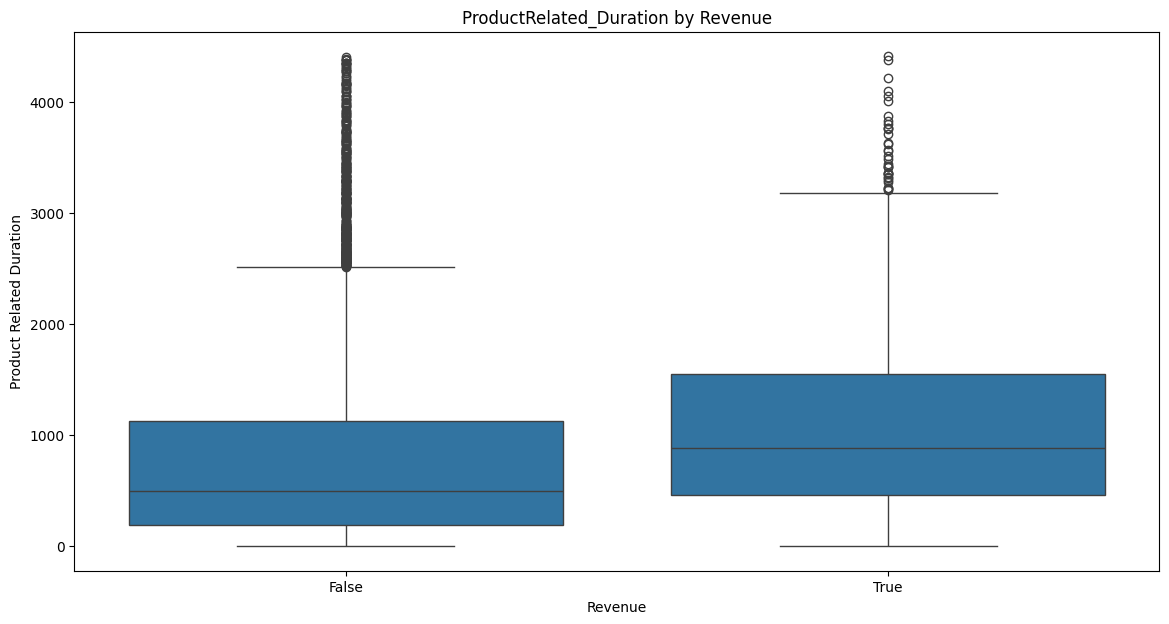

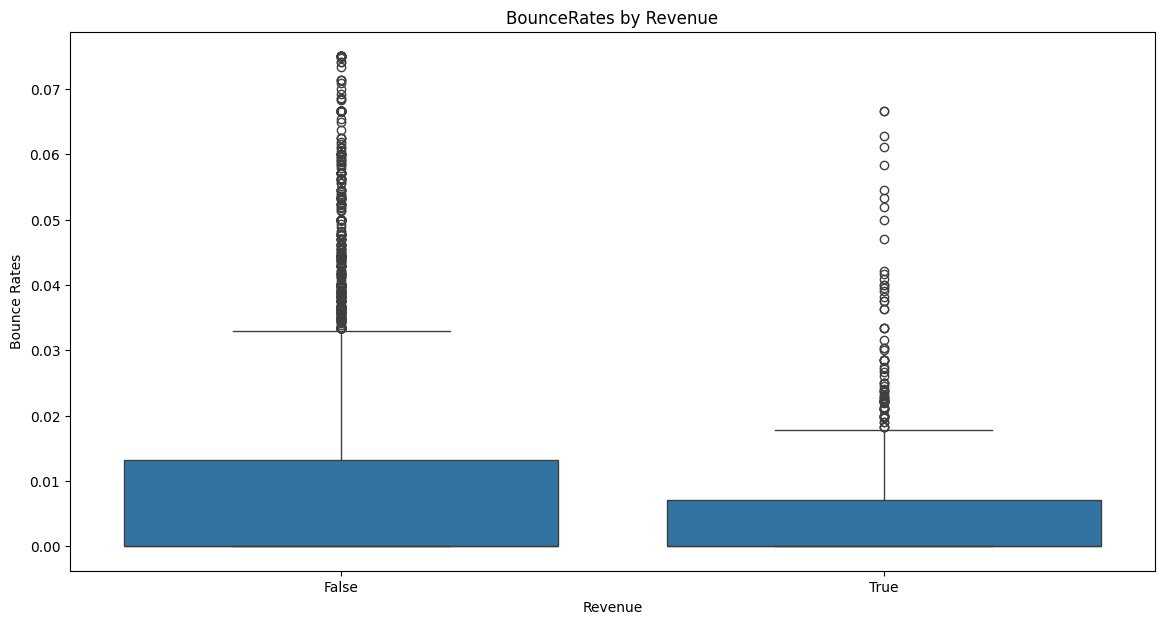

In [ ]:
# Analyzing the relationship between ProductRelated_Duration, BounceRates, and Revenue
plt.figure(figsize=(14, 7))

# Scatter plot of ProductRelated_Duration vs. BounceRates colored by Revenue
sns.scatterplot(x='ProductRelated_Duration', y='BounceRates', hue='Revenue', data=df)
plt.title('ProductRelated_Duration vs. BounceRates colored by Revenue')
plt.xlabel('Product Related Duration')
plt.ylabel('Bounce Rates')
plt.legend(title='Revenue', loc='upper right')

plt.show()

# Correlation analysis to see how these variables correlate with Revenue
corr_matrix = df[['ProductRelated_Duration', 'BounceRates', 'Revenue']].corr()
print(corr_matrix)

# Box plot of ProductRelated_Duration grouped by Revenue
plt.figure(figsize=(14, 7))
sns.boxplot(x='Revenue', y='ProductRelated_Duration', data=df)
plt.title('ProductRelated_Duration by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Product Related Duration')

plt.show()

# Box plot of BounceRates grouped by Revenue
plt.figure(figsize=(14, 7))
sns.boxplot(x='Revenue', y='BounceRates', data=df)
plt.title('BounceRates by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Bounce Rates')

plt.show()

Box Plot: BounceRates by Revenue

Lower bounce rates are associated with higher chances of generating revenue. Efforts to reduce bounce rates (e.g., improving page load times, providing relevant content, and enhancing user navigation) could increase conversions.

 Scatter Plot: ProductRelated_Duration vs. BounceRates colored by Revenue

 Successful sessions (those resulting in revenue) generally have lower bounce rates regardless of the duration spent on product pages. This reinforces the importance of keeping users engaged and reducing bounce rates.
While longer product-related durations are generally beneficial, the quality of engagement is crucial. Simply increasing time spent without improving user experience and reducing bounce rates may not significantly boost conversions.

# 5. Visualization Suggestions

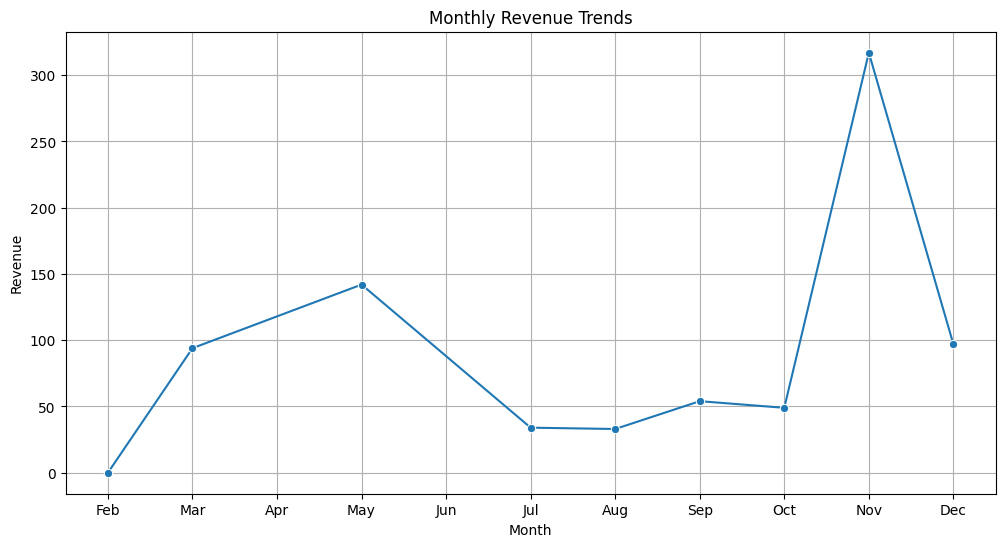

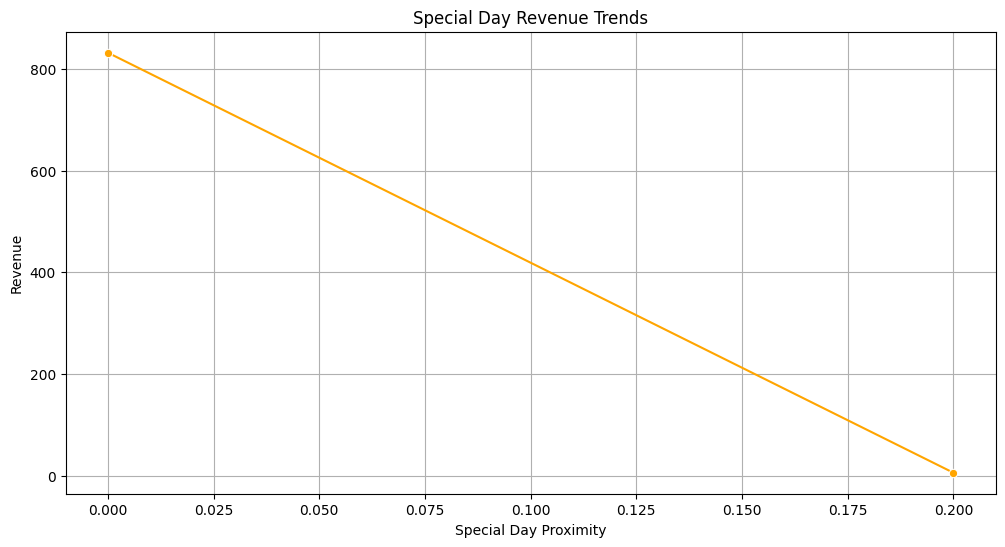

<ipython-input-20-40d124690601>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=visitor_conversion.index, y=visitor_conversion.values, palette='viridis')


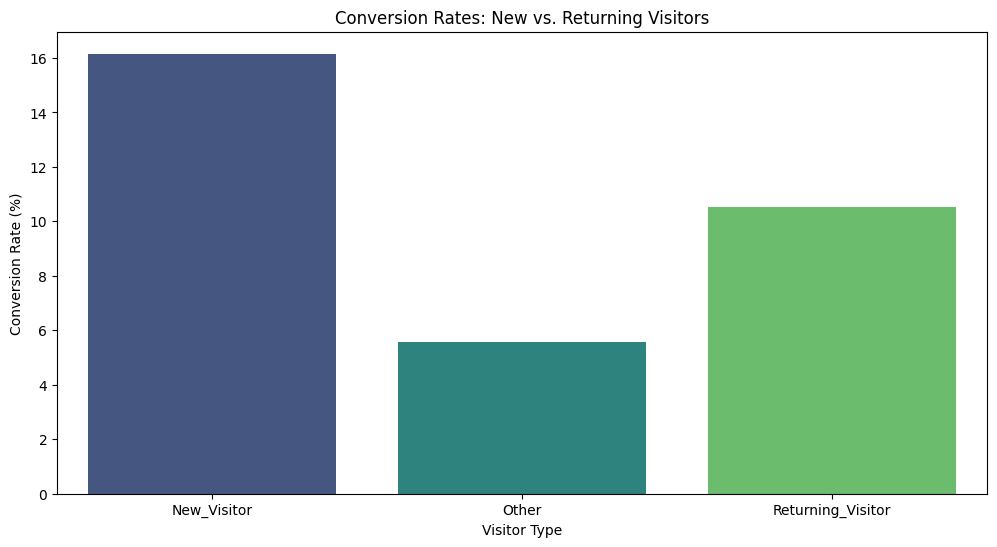

In [ ]:
monthly_revenue = df.groupby('Month')['Revenue'].sum().reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Plotting monthly revenue trends
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_revenue.index, y=monthly_revenue.values, marker='o')
plt.title('Monthly Revenue Trends')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

# Aggregate revenue by special day
special_day_revenue = df.groupby('SpecialDay')['Revenue'].sum()

# Plotting special day revenue trends
plt.figure(figsize=(12, 6))
sns.lineplot(x=special_day_revenue.index, y=special_day_revenue.values, marker='o', color='orange')
plt.title('Special Day Revenue Trends')
plt.xlabel('Special Day Proximity')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

# Conversion rates for new and returning visitors
visitor_conversion = df.groupby('VisitorType')['Revenue'].mean() * 100

# Plotting conversion rates
plt.figure(figsize=(12, 6))
sns.barplot(x=visitor_conversion.index, y=visitor_conversion.values, palette='viridis')
plt.title('Conversion Rates: New vs. Returning Visitors')
plt.xlabel('Visitor Type')
plt.ylabel('Conversion Rate (%)')
plt.show()

1. Monthly Revenue Trends
Seasonal Peaks: The graph shows significant spikes in revenue during May and November. These peaks likely correspond to special shopping seasons, such as the spring sales in May and Black Friday/Cyber Monday sales in November.
Consistent Low Periods: There are consistent low revenue periods in January, February, April, and July, indicating potential off-peak months. Marketing efforts and promotions might be beneficial during these periods to boost sales.
Holiday Impact: The high revenue in November suggests the strong impact of holiday shopping. Planning for inventory and marketing campaigns should take into account the significant increase in transactions during this period.
2. Special Day Revenue Trends
Revenue Decline with Distance from Special Days: The graph shows a clear decline in revenue as the proximity to a special day decreases. This indicates that special days significantly drive transactions, with the highest revenue when the day is imminent.
Strategic Promotions: Implementing strategic promotions and targeted marketing campaigns as special days approach can capitalize on this trend. For example, increasing advertising and offering special discounts in the lead-up to holidays or special events.
3. Conversion Rates: New vs. Returning Visitors
Higher Conversion for New Visitors: Surprisingly, new visitors have a higher conversion rate compared to returning visitors. This might suggest that new visitors are more likely to be influenced by initial impressions and promotional offers.
Potential for Returning Visitor Engagement: Although returning visitors have a lower conversion rate, they represent a valuable segment. Enhancing the user experience, personalized recommendations, and loyalty programs could help increase their conversion rates.
Visitor Type "Other": The "Other" category shows the lowest conversion rate, indicating this group might need targeted interventions to increase their engagement and conversion.
Strategic Recommendations
Seasonal Marketing: Focus on ramping up marketing efforts and promotions during May and November to maximize revenue during these peak months. Prepare inventory and customer support to handle increased demand.

Special Day Promotions: Intensify marketing campaigns and offer attractive deals as special days approach. Use countdowns, special offers, and targeted ads to capitalize on the increased likelihood of transactions during these periods.

Enhancing New Visitor Experience: Since new visitors show higher conversion rates, invest in improving the landing pages, first-time user experience, and onboarding processes to convert more first-time visitors into customers.

Engaging Returning Visitors: Develop strategies to re-engage returning visitors through personalized offers, loyalty programs, and retargeting campaigns. Analyze their browsing and purchasing behavior to tailor recommendations and incentives.

Addressing Low Conversion Segments: Investigate the characteristics of the "Other" visitor segment and implement specific strategies to improve their conversion rates. This might include personalized marketing, improved user experience, and targeted promotions.

By implementing these strategies, the business can optimize its revenue generation efforts bas

# Distribution Analysis

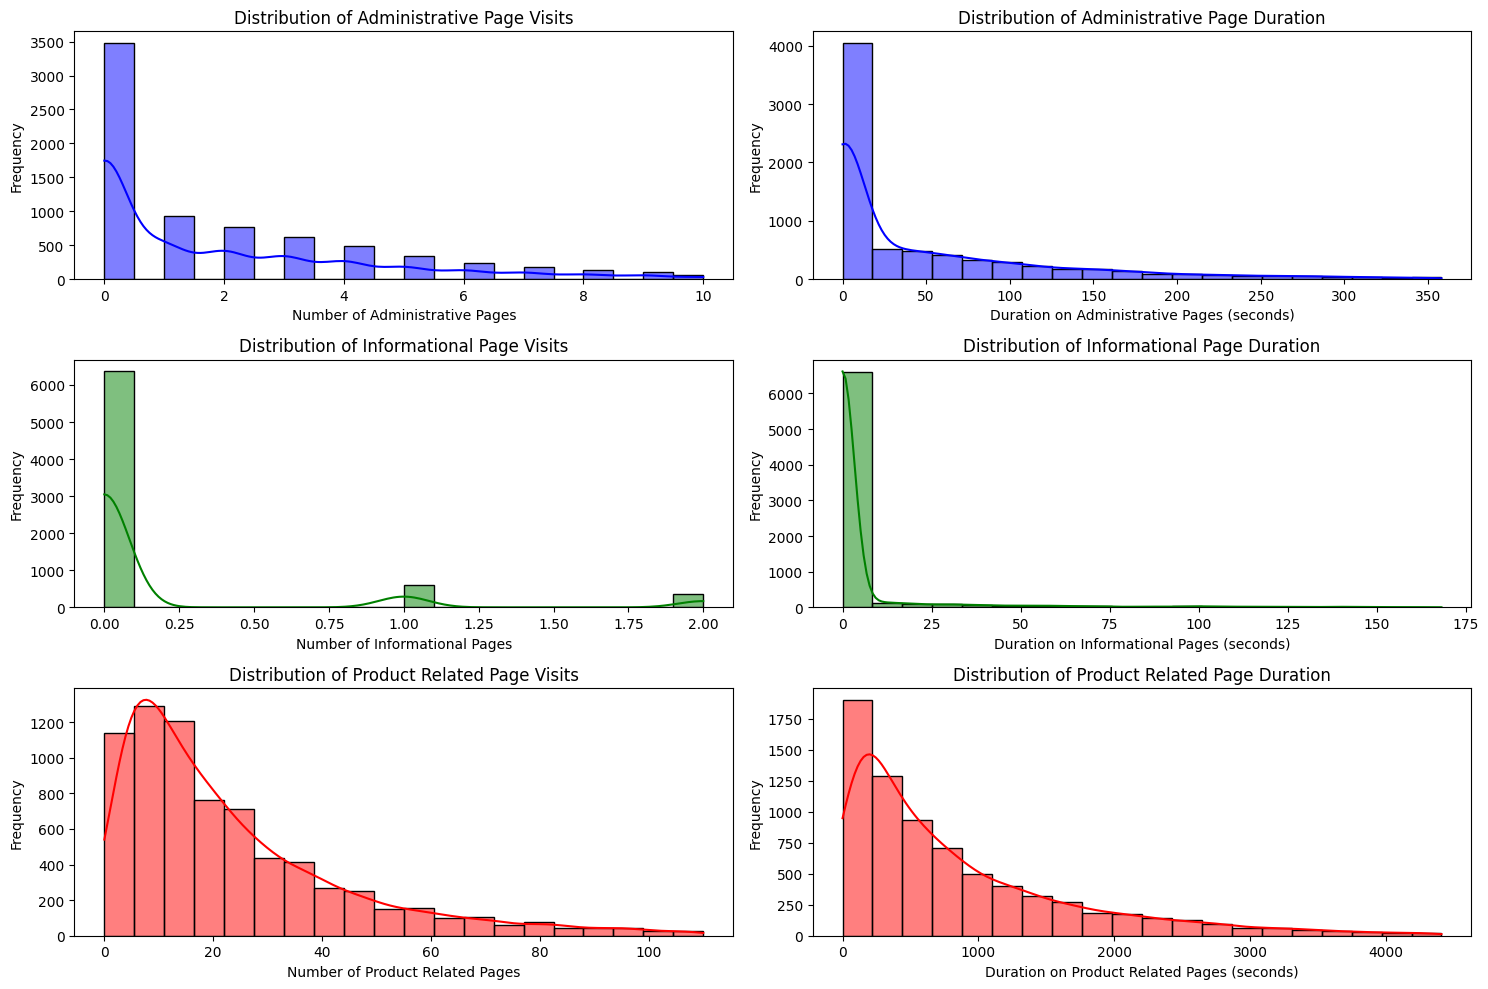

Correlation between ProductRelated_Duration and Revenue: 0.12408493649182883
Correlation between Administrative_Duration and Revenue: 0.08356437725351099
Correlation between Informational_Duration and Revenue: 0.05286946445764487


In [ ]:
plt.figure(figsize=(15, 10))

# Administrative pages
plt.subplot(3, 2, 1)
sns.histplot(df['Administrative'], bins=20, kde=True, color='blue')
plt.title('Distribution of Administrative Page Visits')
plt.xlabel('Number of Administrative Pages')
plt.ylabel('Frequency')

# Administrative Duration
plt.subplot(3, 2, 2)
sns.histplot(df['Administrative_Duration'], bins=20, kde=True, color='blue')
plt.title('Distribution of Administrative Page Duration')
plt.xlabel('Duration on Administrative Pages (seconds)')
plt.ylabel('Frequency')

# Informational pages
plt.subplot(3, 2, 3)
sns.histplot(df['Informational'], bins=20, kde=True, color='green')
plt.title('Distribution of Informational Page Visits')
plt.xlabel('Number of Informational Pages')
plt.ylabel('Frequency')

# Informational Duration
plt.subplot(3, 2, 4)
sns.histplot(df['Informational_Duration'], bins=20, kde=True, color='green')
plt.title('Distribution of Informational Page Duration')
plt.xlabel('Duration on Informational Pages (seconds)')
plt.ylabel('Frequency')

# Product Related pages
plt.subplot(3, 2, 5)
sns.histplot(df['ProductRelated'], bins=20, kde=True, color='red')
plt.title('Distribution of Product Related Page Visits')
plt.xlabel('Number of Product Related Pages')
plt.ylabel('Frequency')

# Product Related Duration
plt.subplot(3, 2, 6)
sns.histplot(df['ProductRelated_Duration'], bins=20, kde=True, color='red')
plt.title('Distribution of Product Related Page Duration')
plt.xlabel('Duration on Product Related Pages (seconds)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Analyzing the correlation between page durations and revenue
corr_product_duration_revenue = df[['ProductRelated_Duration', 'Revenue']].corr().iloc[0, 1]
corr_admin_duration_revenue = df[['Administrative_Duration', 'Revenue']].corr().iloc[0, 1]
corr_info_duration_revenue = df[['Informational_Duration', 'Revenue']].corr().iloc[0, 1]

print("Correlation between ProductRelated_Duration and Revenue:", corr_product_duration_revenue)
print("Correlation between Administrative_Duration and Revenue:", corr_admin_duration_revenue)
print("Correlation between Informational_Duration and Revenue:", corr_info_duration_revenue)

Administrative Pages:
Distribution of Administrative Page Visits:

The majority of sessions involve 0 to 2 administrative page visits, indicating that users do not frequently interact with administrative pages.
The frequency sharply drops after 2 visits, suggesting that users who do visit administrative pages typically only visit a few.
Distribution of Administrative Page Duration:

Most sessions involve very short durations on administrative pages, with a high frequency of durations under 50 seconds.
The duration distribution is right-skewed, indicating that while most users spend a short amount of time, a few spend considerably longer on these pages.
Informational Pages:
Distribution of Informational Page Visits:

Most sessions have 0 to 1 informational page visits, showing that users seldom visit informational pages.
There is a steep decline in the frequency of visits beyond 1 page, indicating limited engagement with informational content.
Distribution of Informational Page Duration:

The time spent on informational pages is predominantly short, with most users spending under 25 seconds.
The right-skewed distribution again shows that while the majority spend little time, a few users engage for longer periods.
Product Related Pages:
Distribution of Product Related Page Visits:

Sessions typically involve higher engagement with product-related pages, with a mode around 5 to 15 page visits.
There is a gradual decline in frequency as the number of product-related pages increases, indicating that users explore multiple products before making decisions.
Distribution of Product Related Page Duration:

The time spent on product-related pages varies more widely, with a notable number of sessions involving significant engagement (up to several thousand seconds).
The distribution suggests that product-related pages are where users spend the majority of their session time, reflecting deeper engagement with product content.
Key Takeaways:
User Engagement:

Users tend to spend minimal time on administrative and informational pages, suggesting that these are not primary areas of interest or decision-making.
Product-related pages, however, show higher engagement both in terms of visits and time spent, highlighting their importance in the user journey.
Optimization Opportunities:

Administrative Pages: Streamlining administrative content to be more efficient could enhance user experience, as users tend to spend limited time here.
Informational Pages: Improving the content or accessibility of informational pages could potentially increase engagement if these pages are deemed valuable.
Product Pages: Since users spend most of their time on product-related pages, ensuring these pages are highly informative, visually appealing, and easy to navigate could further enhance user satisfaction and potentially drive conversions.
Conversion Insights:

While the graphs do not directly show conversion rates, the high engagement on product-related pages suggests a strong correlation with revenue. Focusing on optimizing these pages could lead to better conversion outcomes.
These insights can guide targeted improvements across different page types, enhancing overall user experience and potentially increasing conversion rates.

#3. Predictive Analytics:

##As revenue is the targeted variable
### Drop it from the df

#Split data into train and test sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Initialize different models and compare the accuracy of each

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
logistic_reg = LogisticRegression()
decision_tree = DecisionTreeClassifier()
svm = SVC()
knn = KNeighborsClassifier()

logistic_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
svm.fit(X_train, y_train)
knn.fit(X_train,y_train)

KNeighborsClassifier()

#Evaluating Models Using Different Metrics

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Evaluation of each function
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f'Performance of {model.__class__.__name__}:')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')
    print(classification_report(y_test, y_pred))

In [ ]:
evaluate_model(logistic_reg, X_test, y_test)
evaluate_model(decision_tree, X_test, y_test)
evaluate_model(svm, X_test, y_test)
evaluate_model(knn, X_test, y_test)

Performance of LogisticRegression:
Accuracy: 0.91
Precision: 0.65
Recall: 0.38
F1 Score: 0.48
              precision    recall  f1-score   support

       False       0.93      0.98      0.95      1310
        True       0.65      0.38      0.48       155

    accuracy                           0.91      1465
   macro avg       0.79      0.68      0.72      1465
weighted avg       0.90      0.91      0.90      1465

Performance of DecisionTreeClassifier:
Accuracy: 0.88
Precision: 0.44
Recall: 0.46
F1 Score: 0.45
              precision    recall  f1-score   support

       False       0.94      0.93      0.93      1310
        True       0.44      0.46      0.45       155

    accuracy                           0.88      1465
   macro avg       0.69      0.70      0.69      1465
weighted avg       0.88      0.88      0.88      1465

Performance of SVC:
Accuracy: 0.92
Precision: 0.69
Recall: 0.46
F1 Score: 0.55
              precision    recall  f1-score   support

       False       0

# 4. Model Optimization

In [ ]:
from sklearn.model_selection import GridSearchCV

# parameter grid for Logistic Regression
param_grid_lr = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'saga']
}

grid_search_lr = GridSearchCV(logistic_reg, param_grid_lr, cv=5, scoring='f1')
grid_search_lr.fit(X_train, y_train)
best_lr = grid_search_lr.best_estimator_

print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best F1 score for Logistic Regression:", grid_search_lr.best_score_)

y_pred_best_lr = best_lr.predict(X_test)
print("Logistic Regression after tuning:\n", classification_report(y_test, y_pred_best_lr))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: Futur

Best parameters for Logistic Regression: {'C': 0.01, 'penalty': 'none', 'solver': 'saga'}
Best F1 score for Logistic Regression: 0.47688430594211495
Logistic Regression after tuning:
               precision    recall  f1-score   support

       False       0.93      0.98      0.95      1310
        True       0.65      0.38      0.48       155

    accuracy                           0.91      1465
   macro avg       0.79      0.68      0.72      1465
weighted avg       0.90      0.91      0.90      1465



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


# Decision Tree Hyperparameter Tuning


In [ ]:
# parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}


grid_search_dt = GridSearchCV(decision_tree, param_grid_dt, cv=5, scoring='f1')
grid_search_dt.fit(X_train, y_train)
best_dt = grid_search_dt.best_estimator_

print("Best parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best F1 score for Decision Tree:", grid_search_dt.best_score_)

y_pred_best_dt = best_dt.predict(X_test)
print("Decision Tree after tuning:\n", classification_report(y_test, y_pred_best_dt))


Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best F1 score for Decision Tree: 0.49645405547152544
Decision Tree after tuning:
               precision    recall  f1-score   support

       False       0.94      0.96      0.95      1310
        True       0.56      0.48      0.52       155

    accuracy                           0.91      1465
   macro avg       0.75      0.72      0.73      1465
weighted avg       0.90      0.91      0.90      1465



# Support Vector Classifier (SVC) Hyperparameter Tuning


In [ ]:
from sklearn.model_selection import GridSearchCV

# # parameter grid for SVC
param_grid_svc = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

grid_search_svc = GridSearchCV(svm, param_grid_svc, cv=5, scoring='f1')
grid_search_svc.fit(X_train, y_train)
best_svc = grid_search_svc.best_estimator_

print("Best parameters for SVC:", grid_search_svc.best_params_)
print("Best F1 score for SVC:", grid_search_svc.best_score_)

y_pred_best_svc = best_svc.predict(X_test)
print("SVC after tuning:\n", classification_report(y_test, y_pred_best_svc))


Best parameters for SVC: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best F1 score for SVC: 0.5407301742320939
SVC after tuning:
               precision    recall  f1-score   support

       False       0.94      0.97      0.95      1310
        True       0.65      0.47      0.54       155

    accuracy                           0.92      1465
   macro avg       0.79      0.72      0.75      1465
weighted avg       0.91      0.92      0.91      1465



#K-Nearest Neighbors (KNN) Hyperparameter Tuning


In [ ]:
from sklearn.model_selection import GridSearchCV

# parameter grid for knn
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# KNN Grid Search
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='f1')
grid_search_knn.fit(X_train, y_train)
best_knn = grid_search_knn.best_estimator_

print("Best parameters for KNN:", grid_search_knn.best_params_)
print("Best F1 score for KNN:", grid_search_knn.best_score_)

y_pred_best_knn = best_knn.predict(X_test)
print("KNN after tuning:\n", classification_report(y_test, y_pred_best_knn))


Best parameters for KNN: {'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'distance'}
Best F1 score for KNN: 0.4597483090456901
KNN after tuning:
               precision    recall  f1-score   support

       False       0.93      0.98      0.95      1310
        True       0.66      0.37      0.48       155

    accuracy                           0.91      1465
   macro avg       0.79      0.68      0.72      1465
weighted avg       0.90      0.91      0.90      1465

